<img src= 'http://www.bigbang-datascience.com/wp-content/uploads/2017/09/cropped-Logo-01.jpg' width=300/>

# Association Rules - Apriori

In [ ]:
#pip install mlxtend

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

### Theory of Apriori Algorithm
There are three major components of Apriori algorithm:

  **Support**  
  **Confidence**  
  **Lift**

Suppose we have a record of 1 thousand customer transactions, and we want to find the Support, Confidence, and Lift for two items e.g. burgers and ketchup. Out of one thousand transactions, 100 contain ketchup while 150 contain a burger. Out of 150 transactions where a burger is purchased, 50 transactions contain ketchup as well. Using this data, we want to find the support, confidence, and lift.

**Support**
Support refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions. Suppose we want to find support for item B. This can be calculated as:

In [ ]:
Support(B) = (Transactions containing (B))/(Total Transactions)

For instance if out of 1000 transactions, 100 transactions contain Ketchup then the support for item Ketchup can be calculated as:

In [ ]:
Support(Ketchup) = (Transactions containingKetchup)/(Total Transactions)
Support(Ketchup) = 100/1000
                 = 10%

**Confidence**  
Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought. Mathematically, it can be represented as:

In [ ]:
Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)

Coming back to our problem, we had 50 transactions where Burger and Ketchup were bought together. While in 150 transactions, burgers are bought. Then we can find likelihood of buying ketchup when a burger is bought can be represented as confidence of Burger -> Ketchup and can be mathematically written as:

In [ ]:
Confidence(Burger→Ketchup) = (Transactions containing both (Burger and Ketchup))/(Transactions containing A)

Confidence(Burger→Ketchup) = 50/150
                           = 33.3%

**Lift**  
Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold. Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B). Mathematically it can be represented as:

In [ ]:
Lift(A→B) = (Confidence (A→B))/(Support (B))

Coming back to our Burger and Ketchup problem, the Lift(Burger -> Ketchup) can be calculated as:

In [ ]:
Lift(Burger→Ketchup) = (Confidence (Burger→Ketchup))/(Support (Ketchup))

Lift(Burger→Ketchup) = 33.3/10
                     = 3.33

**Lift** basically tells us that the likelihood of buying a Burger and Ketchup together is 3.33 times more than the likelihood of just buying the ketchup. A Lift of 1 means there is no association between products A and B. Lift of greater than 1 means products A and B are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.



### Importing the Dataset
Now let's import the dataset and see what we're working with. Download the dataset and place it in the "Datasets" folder of the "D" drive (or change the code below to match the path of the file on your computer) and execute the following script:

In [2]:
trans = pd.read_csv('Transactions.csv', sep=',', header = None) 

In [3]:
print(type(trans))

<class 'pandas.core.frame.DataFrame'>


In [4]:
trans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


Each row of the dataset represents items that were purchased together on the same day at the same store.The dataset is a sparse dataset as relatively high percentage of data is NA or NaN or equivalent.
These NaNs make it hard to read the table. Let’s find out how many unique items are actually there in the table.

In [6]:
items = (trans[0].unique())
items

array(['shrimp', 'burgers', 'chutney', 'turkey', 'mineral water',
       'low fat yogurt', 'whole wheat pasta', 'soup', 'frozen vegetables',
       'french fries', 'eggs', 'cookies', 'spaghetti', 'meatballs',
       'red wine', 'rice', 'parmesan cheese', 'ground beef',
       'sparkling water', 'herb & pepper', 'pickles', 'energy bar',
       'fresh tuna', 'escalope', 'avocado', 'tomato sauce',
       'clothes accessories', 'energy drink', 'chocolate',
       'grated cheese', 'yogurt cake', 'mint', 'asparagus', 'champagne',
       'ham', 'muffins', 'french wine', 'chicken', 'pasta', 'tomatoes',
       'pancakes', 'frozen smoothie', 'carrots', 'yams', 'shallot',
       'butter', 'light mayo', 'pepper', 'candy bars', 'cooking oil',
       'milk', 'green tea', 'bug spray', 'oil', 'olive oil', 'salmon',
       'cake', 'almonds', 'salt', 'strong cheese', 'hot dogs', 'pet food',
       'whole wheat rice', 'antioxydant juice', 'honey', 'sandwich',
       'salad', 'magazines', 'protein bar', '

In [7]:
len(items)

115

### Data Preprocessing
To make use of the apriori module given by mlxtend library, we need to convert the dataset according to it’s liking. apriori module requires a dataframe that has either 0 and 1 or True and False as data. The data we have is all string (name of items), we need to One Hot Encode the data.

Custom One Hot Encoding

### One Hot Encoding

In [8]:
encoded_vals = []
for index, row in trans.iterrows():  #Iterate over DataFrame rows as (index, Series) pairs.
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row)) # Return a set that contains the items that exist in both set x, and set y:
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_trans = pd.DataFrame(encoded_vals)

In [9]:
encoded_vals[1]

{'low fat yogurt': 0,
 'cider': 0,
 'black tea': 0,
 'escalope': 0,
 'mint': 0,
 'carrots': 0,
 'shampoo': 0,
 'green tea': 0,
 'cereals': 0,
 'parmesan cheese': 0,
 'light mayo': 0,
 'cake': 0,
 'green grapes': 0,
 'fromage blanc': 0,
 'melons': 0,
 'cottage cheese': 0,
 'ground beef': 0,
 'soda': 0,
 'fresh bread': 0,
 'soup': 0,
 'pasta': 0,
 'french wine': 0,
 'eggplant': 0,
 'energy bar': 0,
 'tomatoes': 0,
 'whole weat flour': 0,
 'ham': 0,
 'grated cheese': 0,
 'pepper': 0,
 'tomato juice': 0,
 'extra dark chocolate': 0,
 'sparkling water': 0,
 'bug spray': 0,
 'nonfat milk': 0,
 'mineral water': 0,
 'muffins': 0,
 'salad': 0,
 'whole wheat pasta': 0,
 'tomato sauce': 0,
 'champagne': 0,
 'oil': 0,
 'protein bar': 0,
 'butter': 0,
 'pet food': 0,
 'bacon': 0,
 'mayonnaise': 0,
 'dessert wine': 0,
 'chocolate bread': 0,
 'blueberries': 0,
 'energy drink': 0,
 'barbecue sauce': 0,
 'fresh tuna': 0,
 'strawberries': 0,
 'chutney': 0,
 'oatmeal': 0,
 'flax seed': 0,
 'mashed potato'

In [10]:
encoded_vals[0]

{'cider': 0,
 'black tea': 0,
 'escalope': 0,
 'mint': 0,
 'carrots': 0,
 'shampoo': 0,
 'cereals': 0,
 'parmesan cheese': 0,
 'light mayo': 0,
 'cake': 0,
 'fromage blanc': 0,
 'melons': 0,
 'ground beef': 0,
 'soda': 0,
 'fresh bread': 0,
 'soup': 0,
 'pasta': 0,
 'french wine': 0,
 'eggplant': 0,
 'energy bar': 0,
 'tomatoes': 0,
 'ham': 0,
 'grated cheese': 0,
 'pepper': 0,
 'extra dark chocolate': 0,
 'sparkling water': 0,
 'bug spray': 0,
 'burgers': 0,
 'meatballs': 0,
 'nonfat milk': 0,
 'muffins': 0,
 'whole wheat pasta': 0,
 'tomato sauce': 0,
 'champagne': 0,
 'oil': 0,
 'protein bar': 0,
 'butter': 0,
 'pet food': 0,
 'eggs': 0,
 'bacon': 0,
 'mayonnaise': 0,
 'dessert wine': 0,
 'chocolate bread': 0,
 'blueberries': 0,
 'barbecue sauce': 0,
 'fresh tuna': 0,
 'strawberries': 0,
 'chutney': 0,
 'oatmeal': 0,
 'flax seed': 0,
 'mashed potato': 0,
 'green beans': 0,
 'salt': 0,
 'turkey': 0,
 'gums': 0,
 'light cream': 0,
 'pancakes': 0,
 'rice': 0,
 'frozen vegetables': 0,
 

In [11]:
ohe_trans

,cider,black tea,escalope,mint,carrots,shampoo,cereals,parmesan cheese,light mayo,cake,...,tomato juice,honey,mineral water,almonds,yams,salad,vegetables mix,spinach,salmon,energy drink
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Applying Apriori - Working with Sparse Representations

apriori module from mlxtend library provides fast and efficient apriori implementation.

__Parameters__

__df__ : One-Hot-Encoded DataFrame or DataFrame that has 0 and 1 or True and False as values
__min_support__ : Floating point value between 0 and 1 that indicates the minimum support required for an itemset to be selected.  

of observation with item / total observation# of observation with item / total observation

__use_colnames__ : This allows to preserve column names for itemset making it more readable.
__max_len__ : Max length of itemset generated. If not set, all possible lengths are evaluated.
__verbose__ : Shows the number of iterations if >= 1 and low_memory is True. If =1 and low_memory is False , shows the number of combinations.

__low_memory__ :
If True, uses an iterator to search for combinations above min_support. Note that while low_memory=True should only be used for large dataset if memory resources are limited, because this implementation is approx. 3–6x slower than the default.

In [12]:
freq_items = apriori(ohe_trans,
                     min_support=0.02, 
                     use_colnames=True, 
                     verbose=1)
freq_items

Processing 654 combinations | Sampling itemset size 3


C:\Users\sohni\anaconda3\envs\mlenv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,support,itemsets
0,0.079323,(escalope)
1,0.025730,(cereals)
2,0.027196,(light mayo)
3,0.081056,(cake)
4,0.098254,(ground beef)
...,...,...
98,0.023997,"(mineral water, low fat yogurt)"
99,0.031063,"(mineral water, green tea)"
100,0.020264,"(mineral water, frozen smoothie)"
101,0.023597,"(mineral water, shrimp)"


### Applying Association Rules

The next step is to apply the Association Rules algorithm on the dataset. To do so, we can use the Association Rules class that we imported from the Association Rules library.   

The Association Rules class requires some parameter values to work. The first parameter is the list of list that you want to extract rules from. The second parameter is the min_support parameter. This parameter is used to select the items with support values greater than the value specified by the parameter. Next, the min_confidence parameter filters those rules that have confidence greater than the confidence threshold specified by the parameter. Similarly, the min_lift parameter specifies the minimum lift value for the short listed rules. Finally, the min_length parameter specifies the minimum number of items that you want in your rules.   

Let's suppose that we want rules for only those items that are purchased at least 5 times a day, or 7 x 5 = 35 times in one week, since our dataset is for a one-week time period. The support for those items can be calculated as 35/7500 = 0.0045. The minimum confidence for the rules is 20% or 0.2. Similarly, we specify the value for lift as 3 and finally min_length is 2 since we want at least two products in our rules. These values are mostly just arbitrarily chosen, so you can play with these values and see what difference it makes in the rules you get back out.

Execute the following script:

In [13]:
# Metric can be set to confidence, lift, support, leverage and conviction.

rules = association_rules(freq_items, 
                          metric="confidence", 
                          min_threshold=0.3)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921
1,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
2,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
3,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
4,(tomatoes),(spaghetti),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117


In the second line here we convert the rules found by the apriori class into a list since it is easier to view the results in this form.

### Viewing the Results
Let's first find the total number of rules mined by the apriori class. Execute the following script:

In [14]:
print(len(rules))

20


### Visualizing results

__1. Support vs Confidence__

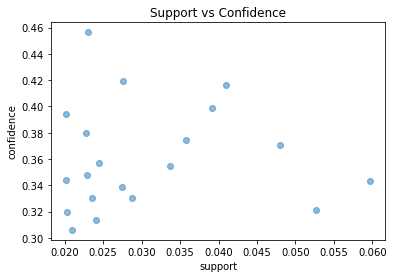

In [15]:
plt.scatter(rules['support'], 
            rules['confidence'], 
            alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

__2. Support vs Lift__

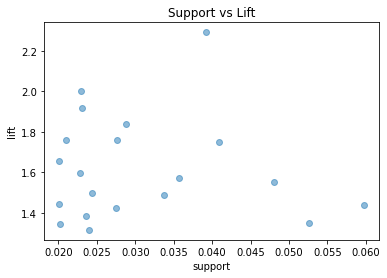

In [16]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

__3. Lift vs Confidence__

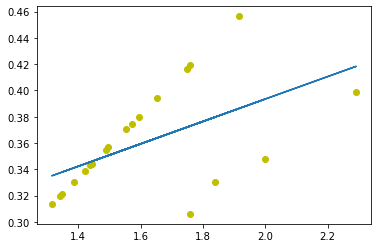

In [17]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# Applying Apriori - as a list

The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list. Currently, we have data in the form of a pandas data frame. To convert our pandas data frame into a list of lists, execute the following script:


In [18]:
# Create the sparsity Matrix using the fo loop
transactions = []
for i in range(0, 7501):
    transactions.append([str(trans.values[i,j]) for j in range(0, 20)]) # Transforming to string

In [23]:
#pip install apyori

In [24]:

from apyori import apriori

In [25]:
print(type(transactions))

<class 'list'>


In [26]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [27]:
len(transactions)

7501

In [37]:
transactions[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [38]:
transactions[-1]

['eggs',
 'frozen smoothie',
 'yogurt cake',
 'low fat yogurt',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

### Implementing Apriori
We can now specify the parameters of the apriori class.  
__The List__  
__min_support__  
__min_confidence__  
__min_lift__  
__min_length (the minimum number of items that you want in your rules, typically 2)__ 

Let’s suppose that we want only items that are purchased at least 40 times in a month. The support for those items can be calculated as 40/7500 = 0.0053. The minimum confidence for the rules is 20% or 0.2. Similarly, we specify the value for lift as 3 and finally, min_length is 2 since we want at least two products in our rules. These values are mostly just arbitrarily chosen and they need to be fine-tuned empirically.

In [39]:
association_rules = apriori(transactions, 
                            min_support = 0.0053, 
                            min_confidence=0.2,
                            min_lift=3, 
                            min_length = 3)
results = list(association_rules)

In [40]:
results[0]

RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])

In [41]:
len(results)

32

In [42]:
for result in results[:10]:
    items = result[0]
    items = [x for x in items]
    print('Rule: ' + items[0] + '  --> ' + items[1])
    print('Support {:.4f}'.format(result[1]))
    print('Confidence {:.4f}'.format(float(result[2][0][2])))
    print('Lift {:.4f}'.format(result[2][0][3]))
    print('============\n')

Rule: mushroom cream sauce  --> escalope
Support 0.0057
Confidence 0.3007
Lift 3.7908

Rule: pasta  --> escalope
Support 0.0059
Confidence 0.3729
Lift 4.7008

Rule: ground beef  --> herb & pepper
Support 0.0160
Confidence 0.3235
Lift 3.2920

Rule: ground beef  --> tomato sauce
Support 0.0053
Confidence 0.3774
Lift 3.8407

Rule: whole wheat pasta  --> olive oil
Support 0.0080
Confidence 0.2715
Lift 4.1224

Rule: chocolate  --> frozen vegetables
Support 0.0053
Confidence 0.2326
Lift 3.2545

Rule: mushroom cream sauce  --> escalope
Support 0.0057
Confidence 0.3007
Lift 3.7908

Rule: pasta  --> escalope
Support 0.0059
Confidence 0.3729
Lift 4.7008

Rule: spaghetti  --> ground beef
Support 0.0087
Confidence 0.3110
Lift 3.1653

Rule: mineral water  --> frozen vegetables
Support 0.0072
Confidence 0.3051
Lift 3.2006



In [43]:
# Visualising the results
# results = list(rules)
list(results)

[RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]),
 RelationRecord(items=frozenset({'ground beef', 'tomato sauce'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomato sauce'}), items_add=frozenset({'groun